<h1 style="text-align: center;">MODEL INTERPRETATION</h1>

### Import the libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt

from joblib import load

import shap
shap.initjs()

import os

### Load the Data

In [2]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/lgbm-model/best_model.joblib
/kaggle/input/serialized-uti-dataset/preprocessed_unscaled_data.joblib
/kaggle/input/serialized-uti-dataset/preprocessed_data.joblib


In [3]:
X_train_unscaled, X_test_unscaled, y_train, y_test = load(r"/kaggle/input/serialized-uti-dataset/preprocessed_unscaled_data.joblib")

### Load the Model

In [4]:
best_model = load(r"/kaggle/input/lgbm-model/best_model.joblib")

In [5]:
best_model

LGBMClassifier(boosting_type='goss', learning_rate=0.044481715367932224,
               max_depth=3, n_estimators=150, num_leaves=170,
               reg_alpha=0.785698331439618)

### Model Interpretation

In [6]:
def plot_feature_importances(model):
    """
    plots the random forest's feature importance using bar graph.

    Parameters
    ------------
    model : sklearn.base.BaseEstimator
            the scikit-learn model to plot its feature importance

    Returns
    ------------
    None
    """

    n_features = X_train_unscaled.shape[1]

    # get the random forest feature importances and its corresponding columns
    results = {column:value for value, column in zip(model.feature_importances_, X_train_unscaled.columns)}

    # sort the previous results
    sorted_results = {column:value for column, value in sorted(results.items(), key = lambda x: x[1])}

    plt.barh(range(len(sorted_results.values())), sorted_results.values(), align="center", color="steelblue")
    plt.yticks(range(len(sorted_results.values())), sorted_results.keys())

    plt.title("Random Forest: Feature Importance")
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    
    plt.ylim(-1,n_features)

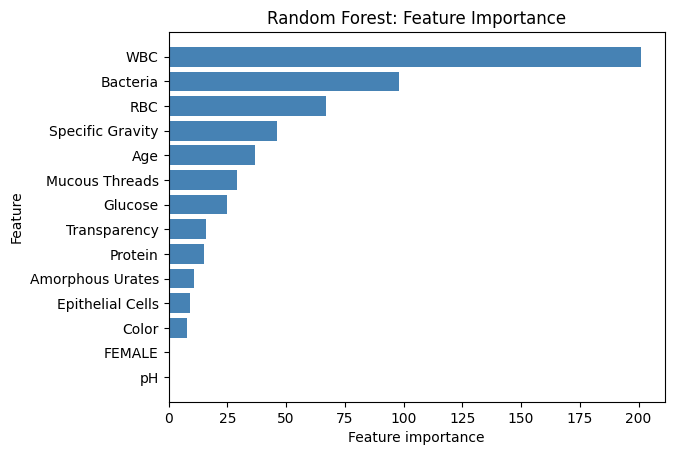

In [7]:
plot_feature_importances(best_model)

In [8]:
# Convert boolean values to integers in the "FEMALE" column of X_train_unscaled
X_train_unscaled["FEMALE"] = [1 if bool_ else 0 for bool_ in X_train_unscaled["FEMALE"]]

# Convert boolean values to integers in the "FEMALE" column of X_test_unscaled
X_test_unscaled["FEMALE"] = [1 if bool_ else 0 for bool_ in X_test_unscaled["FEMALE"]]

In [9]:
# Create a SHAP TreeExplainer for the best Light GBM model
explainer = shap.TreeExplainer(best_model)

# Select an example from the unscaled test set for which you want to compute SHAP values
X_example = X_test_unscaled.iloc[0]

# Compute SHAP values for the entire unscaled test set
shap_values = explainer.shap_values(X_test_unscaled)

### Local Interpretability

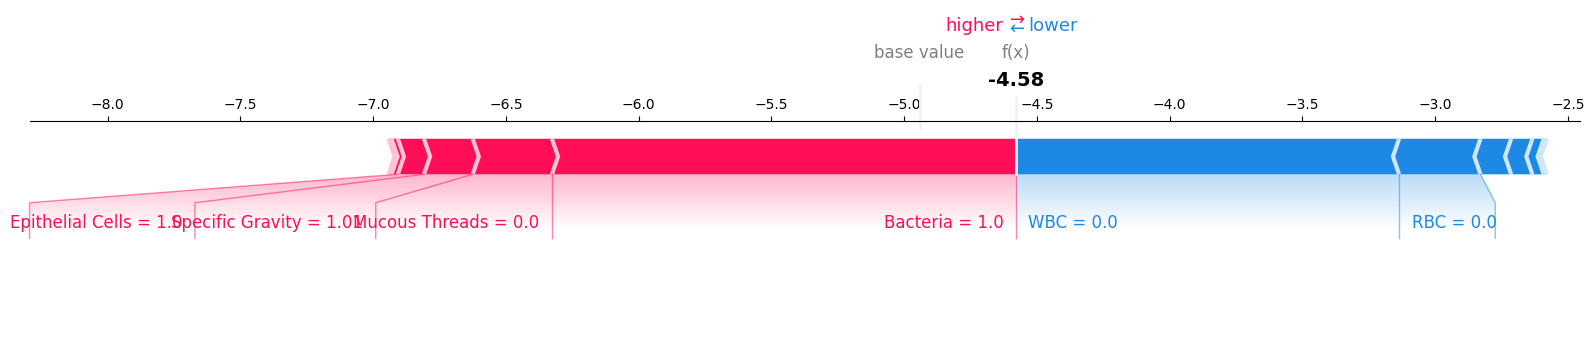

In [10]:
shap.force_plot(explainer.expected_value[1], shap_values[1][1], X_example, matplotlib=True)

### Global Interpretability

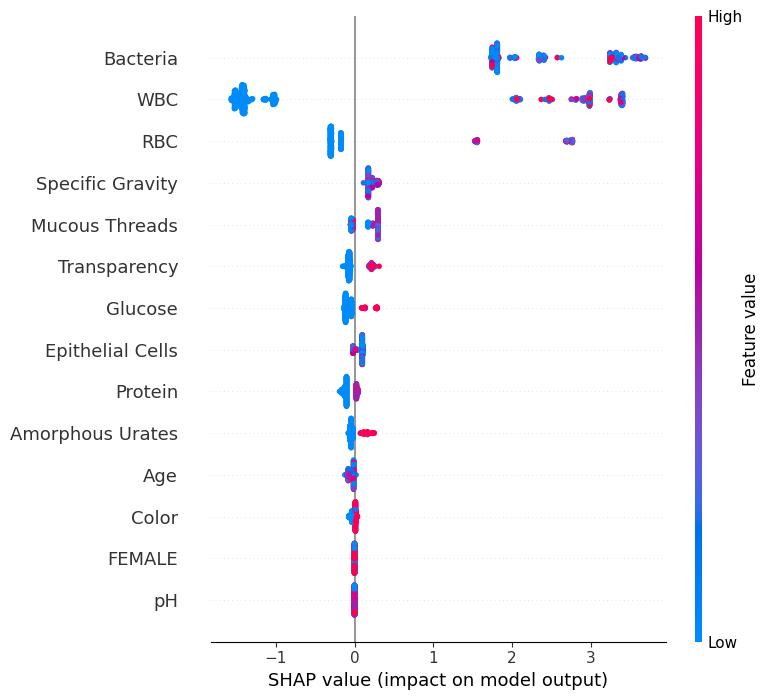

In [11]:
# selecting the first array from the variable values. values[1] = POSITIVE classification
shap.summary_plot(shap_values[1], X_test_unscaled)